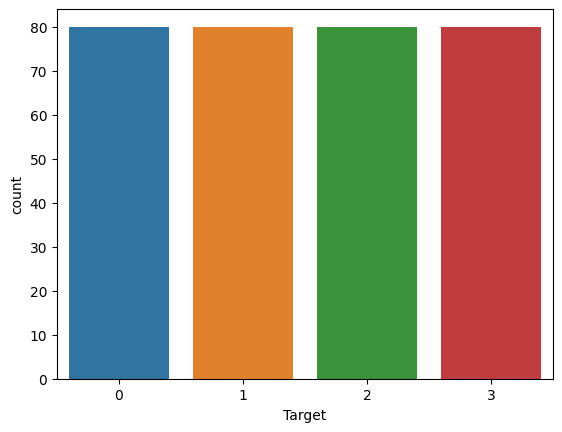

Accuracy is: 92.5
Sensitivity :  1.0
Specificity :  1.0

Classification Report

              precision    recall  f1-score   support

     Class 1       0.82      0.90      0.86        41
     Class 2       1.00      1.00      1.00        43
     Class 3       1.00      1.00      1.00        28
     Class 4       0.91      0.83      0.87        48

    accuracy                           0.93       160
   macro avg       0.93      0.93      0.93       160
weighted avg       0.93      0.93      0.93       160



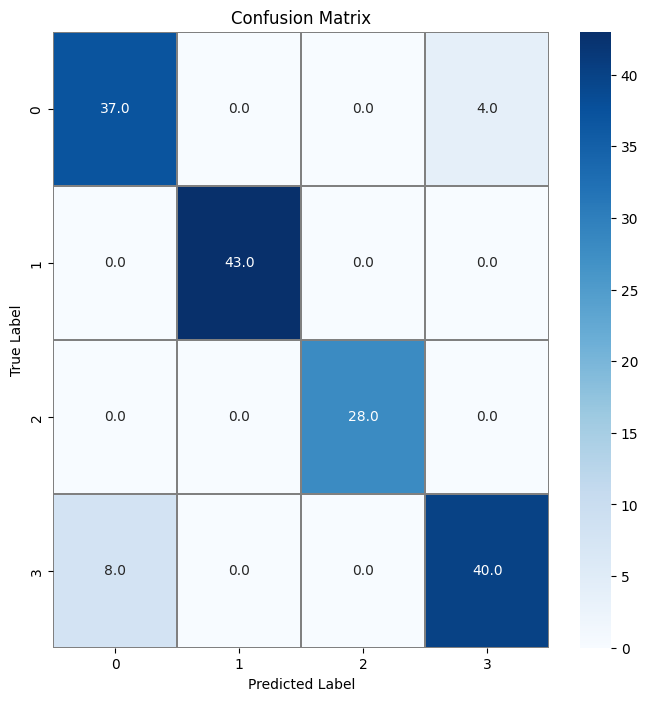

In [4]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
data = pd.read_csv('dataset.csv')
data.head()
data.shape
X = data.iloc[:,:-1]
X.head()
y = data.iloc[:,-1]
y.head()
data['Target'].value_counts()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=2)
sns.countplot(x='Target',data=data)
plt.show()
X_train.shape
X_train.head()
y_test.shape
y_test.head()
from sklearn.metrics import accuracy_score
max_accuracy = 0

from sklearn.neighbors import KNeighborsClassifier


for x in range(1,4):
    model = KNeighborsClassifier(n_neighbors=x)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
filename = 'knn.sav'
pickle.dump(model, open(filename, 'wb'))
acc=(metrics.accuracy_score(y_pred,y_test)*100)
print("Accuracy is:",acc)
cm1 = metrics.confusion_matrix(y_pred,y_test)

total1=sum(sum(cm1))


sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)



import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('\nClassification Report\n')
print(classification_report(y_pred,y_test, target_names=['Class 1', 'Class 2','Class 3', 'Class 4']))




confusion_mtx = confusion_matrix(y_pred,y_test) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import pickle
import urllib.request
import json
from time import sleep
while True:
  conn = urllib.request.urlopen("https://api.thingspeak.com/channels/690526/feeds.json?results=1")
  response = conn.read()
  print ("http status code=%s" % (conn.getcode()))
  data=json.loads(response)
  x=int(data['feeds'][0]['entry_id'])
  y=x
  conn.close()
  while x==y:
    conn = urllib.request.urlopen("https://api.thingspeak.com/channels/690526/feeds.json?results=1")
    response = conn.read()
    #print ("http status code=%s" % (conn.getcode()))
    data=json.loads(response)
    y=int(data['feeds'][0]['entry_id'])
    conn.close()

  conn = urllib.request.urlopen("https://api.thingspeak.com/channels/690526/feeds.json?results=1")
  response = conn.read()
  print ("http status code=%s" % (conn.getcode()))
  data=json.loads(response)
  d=float(data['feeds'][0]['field1'])
  e=float(data['feeds'][0]['field2'])
  f=float(data['feeds'][0]['field3'])
  #g=float(data['feeds'][0]['field4'])
  h=float(data['feeds'][0]['field5'])
  #i=float(data['feeds'][0]['field6'])
  #j=float(data['feeds'][0]['field7'])
  conn.close()
  filename = 'knn.sav'
  loaded_model = pickle.load(open(filename, 'rb'))
  person_reports = [[d,e,f,h]]
  predicted = loaded_model.predict(person_reports)
  print("ANALYSING....")
  print(predicted)
  if predicted[0]==0:
    print("NORMAL")
    conn = urllib.request.urlopen("https://api.thingspeak.com/update?api_key=CGKKAUA33E2VK9J6&field8=NORMAL")
  elif predicted[0]==2:
    conn = urllib.request.urlopen("https://api.thingspeak.com/update?api_key=CGKKAUA33E2VK9J6&field8=Adjusting_the_orthotic_device")
  elif predicted[0]==1:
    conn = urllib.request.urlopen("https://api.thingspeak.com/update?api_key=CGKKAUA33E2VK9J6&field8=Exercise_and_stretching")
  elif predicted[0]==3:
    conn = urllib.request.urlopen("https://api.thingspeak.com/update?api_key=CGKKAUA33E2VK9J6&field8=Lifestyle_changes")


http status code=200
http status code=200
ANALYSING....
[2]
http status code=200


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


http status code=200
ANALYSING....
[0]
NORMAL
http status code=200


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
